## Michael Toolin - Homework 2
## NLP DS7337-403

In [1]:
import platform; print(platform.platform())
import sys; print ("Python", sys.version)
import nltk; print("NLTK", nltk.__version__)
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import PlaintextCorpusReader
from nltk import word_tokenize
import urllib;#print("urllib", urllib.__version__)
from urllib import request
import re; print("re", re.__version__)
import numpy as np; print("Numpy",np.__version__)
import matplotlib.pyplot as plt#; print("Matplotlib",plt.__version__)
import seaborn as sns
import sklearn; print("Scikit-Learn", sklearn.__version__)
import os
print (os.environ['CONDA_PREFIX'])

Windows-10-10.0.17134-SP0
Python 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]
NLTK 3.4


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mtool\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mtool\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


re 2.2.1
Numpy 1.15.4
Scikit-Learn 0.19.1
C:\users\mtool\Anaconda3


In [2]:
###########################################################
#                                                         #
#  downLoadBook                                           #
#                                                         #
# This procedure takes a url  as input                    #
# and downloads the text from the URL and saves the       #
# text locally in ./data directory                        #
#                                                         #
# Input:                                                  #
#   url - url of text to download                         #
#                                                         #
# Output:                                                 #
#   savedFilename.txt - locally stored text file          #
#                                                         #
###########################################################

def downLoadBook (url):
    response = request.urlopen(url)
    localFile = response.read().decode('utf8')
    if debug: 
        print ('Book read in...',len(localFile))
    return localFile


In [3]:
###########################################################
#                                                         #
#  prepNLTK                                               #
#                                                         #
# This function takes in a raw text file and cleans it    #
# by removing any header and trailer text                 #
# The header and trailer identifying strings are passed   #
# in as paramerters                                       #
#                                                         #
# Input:                                                  #
#   string - raw text to clean                            #
#   topSep - text defining end of header text             #
#   botSep - text defining beginning of trailer text      #
#                                                         #
# Output:                                                 #
#   text - text in NLTK format for processing             #
#                                                         #
###########################################################

def prepNLTK(string, topSep, botSep):
    newRaw = string.split(topSep,2)[-1]
    newerRaw = newRaw.split(botSep,1)[0]
    newerRaw1 = newerRaw.strip('\n')
    clean = newerRaw1.strip('\r')
    tokens = word_tokenize(clean)
    text = nltk.Text(tokens)
    
# For debugging
    if debug:
        print ('------------------------')
        print('Raw string ',len(string),type(string))
        print ('Header removed ',len(newRaw),type(newRaw))
        print ('Trailer removed ',len(newerRaw),type(newerRaw))
        print ('Removed n ',len(newerRaw1),type(newerRaw1))
        print ('Removed r ',len(clean),type(clean))
        print ('Tokens ', len(tokens), type(tokens))
        print (tokens[:10])
        print (type(text))
        print (text[100:110])
        print (text.collocations())
        print (newerRaw[-63:-1])
    
    return text

In [4]:
def createCorpusList(bookList):
    
# read each url and calculate stats, save in textStats list
# Read in the three text files
#    Book 1 - McGuffey's Third Eclectic Reader - pg14766.txt
#    Book 2 - McGuffey's Fourth Eclectic Reader - pg14880.txt
#    Book 3 - McGuffey's Fifth Eclectic Reader - pg15040.txt

    bookList.append({'title': "McGuffeys Third Eclectic Reader",
                     'url': 'http://www.gutenberg.org/cache/epub/14766/pg14766.txt',
                     'topSep': 'LESSON I.',
                     'botSep': 'End of the Project Gutenberg EBook ',
                     'totalWords': 0,
                     'lexDiv': 0,
                     'vocSize' : 0,
                     'normalizedLongLexScore': 0,
                     'numLongWords': '',
                     'longWordLex': 0})
             
    bookList.append({'title': "McGuffeys Fourth Eclectic Reader",
                     'url': "http://www.gutenberg.org/cache/epub/14880/pg14880.txt",
                     'topSep': 'S FOURTH READER.',
                     'botSep': 'End of the Project Gutenberg EBook ',
                     'totalWords': 0,
                     'lexDiv': 0,
                     'vocSize' : 0,
                     'normalizedLongLexScore': 0,
                     'numLongWords': '',
                     'longWordLex': 0})
    
    bookList.append({'title': "McGuffeys Fifth Eclectic Reader",
                     'url': "http://www.gutenberg.org/cache/epub/15040/pg15040.txt",
                     'topSep': 'EXERCISES.',
                     'botSep': '*** END OF THIS PROJECT GUTENBERG EBOOK ',
                     'totalWords': 0,
                     'lexDiv': 0,
                     'vocSize' : 0,
                     'normalizedLongLexScore': 0,
                     'numLongWords': '',
                     'longWordLex': 0})
    return bookList

In [5]:
def normalize(myScore):
    maxValue = max(myScore)
    return [(score/maxValue) for score in myScore]

In [6]:
###########################################
#                                         #
# Various text/word scoring routines      #
#                                         #
###########################################

#
# Returns the Lexical Diverstiy
#
def lexicalDiversity (text):
    return len(set(text)) / len(text)

def percentage (count, total):
    return (count/total) * 100
#
# Returns the Vocabulary Size
#
def vocabularySize (text):
    return len(set(text))
#
# Return text difficulty
#
def textDifficultyScore (lexDiv, normVocab, longVocab):
    return((1/3)*lexDiv + (1/3)*normVocab) + (1/3)*longVocab

###################################################################
#                                                                 #
# longWordsStats                                                  #
# Returns the dictionary filled in with Long Words Stats          #
#   Input:                                                        #
#      text    - the text to analyze                              #
#      id      - the dictionary to fill in                        #
#      wordLen - The number of letters that defines a long word   #
#                                                                 #
#   Output: id dictionary values filled in                        #
#      numLongWords  - number of unique long words                #
#      freqLongWords - long words appearing more than wordFreq    #
#                      times                                      #
#      numFreqLngWds - number of frequent long words              #
#      lordWordLex   - lexical score of the set of long words     #
#                                                                 #
###################################################################

def longWordsStats (text, ids ,wordLen):
    
    vocab = set(text)
    longWordsList = [w for w in vocab if len(w) > wordLen]
    longWordsCount = len(longWordsList)
    longWordLex = (len(set(longWordsList)))/ (len(text))
    ids['longWordLex'] = longWordLex
    ids['numLongWords'] = len(longWordsList)
    if debug:
        print('Number of Long words = ', longWordsCount)
        print('Long Word Lex', ids['longWordLex'])
    return (ids)

In [7]:
def graphScores():
    fig =plt.figure(figsize = (14,16))
    #plt.title('Scoring 104 Guttenburg Texts', fontsize=17,)
    #ax = fig.add_subplot(2,2,1)
    #plt.hist(longLexScoreList,bins=104, facecolor='green', alpha=0.75)
    #ax.set_ylabel('Frequency', fontsize = 15)
    #ax.set_xlabel('Long Word Lexical Score',fontsize=15)
    #plt.axvline(x=np.mean(longLexScoreList), color='red', alpha=0.75, linewidth = 2)

    ax = fig.add_subplot(4,1,1)
    plt.hist(lexScoreList,bins=104, facecolor='green', alpha=0.75)
    ax.set_ylabel('Frequency', fontsize = 15)
    ax.set_xlabel('All Word Lexical Score',fontsize=15)
    plt.axvline(x=np.mean(lexScoreList), color='red', alpha=0.75, linewidth = 2)

    ax = fig.add_subplot(4,1,2)
    plt.hist(totalLongWrdList,bins=104, facecolor='green', alpha=0.75)
    ax.set_ylabel('Frequency', fontsize = 15)
    ax.set_xlabel('Normalized Number of Long Words',fontsize=15)
    plt.axvline(x=np.mean(totalLongWrdList), color='red', alpha=0.75, linewidth = 2)

    ax = fig.add_subplot(4,1,3)
    plt.hist(vocabScoreList,bins=104, facecolor='green', alpha=0.75)
    ax.set_ylabel('Frequency', fontsize = 15)
    ax.set_xlabel('Normalized Vocabulary Score',fontsize=15)
    plt.axvline(x=np.mean(vocabScoreList), color='red', alpha=0.75, linewidth = 2)
    
    ax = fig.add_subplot(4,1,4)
    plt.hist(textDiff, bins = 104, facecolor='green', alpha=0.75)
    ax.set_ylabel('Frequency', fontsize = 15)
    ax.set_xlabel('Text Difficulty Score',fontsize=15)
    plt.axvline(x=np.mean(textDiff), color='red', alpha=0.75, linewidth = 2)

    plt.show()

    plt.boxplot(textDiff,vert=False)
    plt.title('Text Difficulty Score')
    plt.show()
#
# Draw scatter plot    
#
    fig =plt.figure(figsize = (14,12))
    ax = fig.add_subplot(2,1,1)
    plt.scatter(vocabScoreList, lexScoreList)
    ax.set_ylabel('Lexical Score', fontsize = 15)
    ax.set_xlabel('Normalized Vocabulary Score',fontsize=15)

    plt.show()
    plt.close()
    
    return

In [8]:
#
# Main routine 
#
debug = 0
bookList = []
textDiff = []
longLexScoreList =[]
lexScoreList = []
vocabScoreList = []
totalWordList = []
totalLongWrdList = []

createCorpusList (bookList)
for ids in bookList: 
    if True:
        print ('URL', ids['url'])    
    raw = downLoadBook(ids['url'])
    text = prepNLTK(raw, str(ids['topSep']), ids['botSep'])
    words = [w.lower() for w in text]
    ids['lexDiv'] = lexicalDiversity(words)
    ids['vocSize'] = vocabularySize(words)
    ids = longWordsStats(text, ids, 15)
    longLexScoreList.append(ids['longWordLex'])
    lexScoreList.append(ids['lexDiv'])
    vocabScoreList.append(ids['vocSize'])
    totalWordList.append(ids['totalWords'])
    totalLongWrdList.append(ids['numLongWords'])
    
vocabScoreList = normalize(vocabScoreList)
totalLongWrdList = normalize(totalLongWrdList)


URL http://www.gutenberg.org/cache/epub/14766/pg14766.txt
URL http://www.gutenberg.org/cache/epub/14880/pg14880.txt
URL http://www.gutenberg.org/cache/epub/15040/pg15040.txt


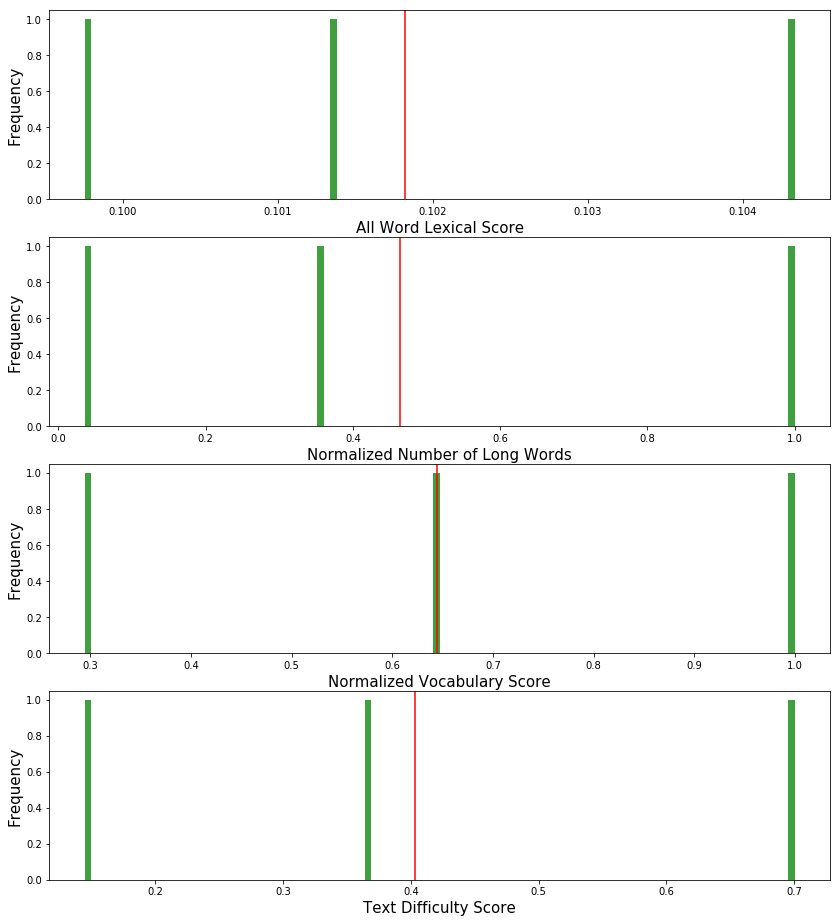

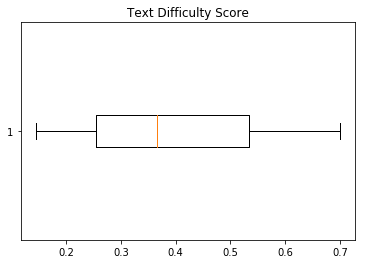

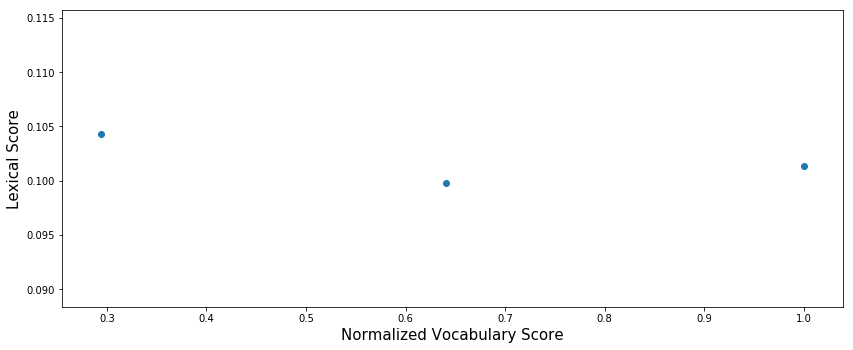

The book  McGuffeys Third Eclectic Reader had the following scores:
   Normalized Vocab Score:  0.2941889668312116
   Normalized Long Word Score:  0.03571428571428571
   Lexical Diversity Score:  0.10433367118154735
   Text Difficulty Score:  0.14474564124234823
The book  McGuffeys Fourth Eclectic Reader had the following scores:
   Normalized Vocab Score:  0.6405992898588377
   Normalized Long Word Score:  0.35714285714285715
   Lexical Diversity Score:  0.09975455820476858
   Text Difficulty Score:  0.3658322350688211
The book  McGuffeys Fifth Eclectic Reader had the following scores:
   Normalized Vocab Score:  1.0
   Normalized Long Word Score:  1.0
   Lexical Diversity Score:  0.10136772245241941
   Text Difficulty Score:  0.7004559074841398


In [9]:
#
# Fill in normalized score into dictionary and 
# calculate text difficulty score
#
%matplotlib inline

for ids, vocabScore in zip(bookList, vocabScoreList):
    ids['normalizedVocabScore'] = vocabScore
    
for ids, lngWrdScore in zip(bookList, totalLongWrdList):
    ids['normalizedLongWordScore'] = lngWrdScore
    
for d in bookList:
    d['textDifficulty'] = textDifficultyScore(d['lexDiv'],d['normalizedVocabScore'], d['normalizedLongWordScore'])
        
    textDiff.append(d['textDifficulty'])
    
graphScores()

for d in bookList:
    print('The book ',d['title'],'had the following scores:')
    print ('   Normalized Vocab Score: ', d['normalizedVocabScore'])
    print ('   Normalized Long Word Score: ', d['normalizedLongWordScore'])
    print ('   Lexical Diversity Score: ', d['lexDiv'])
    print ('   Text Difficulty Score: ', d['textDifficulty'])



## Discussion of findings
I re-examined the books used in the first HW, each one part of McGuffey's Ecletic Reader series. The beginning and ending seperator marks were modified from the first homework to better clean the data. This change in cleaning technique provided clearer results when comparing the third, fourth and fifth grade texts. 

We introduced a new measure into these analysis, a measure of how many _long words_ are present in the text. A long word is identified by examing all the vocabulary and finding words with more than 15 characters. The unique number of long words is counted and used a measure of text difficulty. As described below, normalizing this score provides a way to more accurrately compare texts of different lenghts.

We also provided a normalization routine to be able to more accurately compare texts of different lengths. A standard normalization algorithm was applied to vocabulary score and long word score. The maximum score of all the texts is assigned a value of 1, and the other scores are normalized by using the equation (score/_max_ score). As expected the scores increased as the grades went up, with third grade having the lowest vocabulary score and fifth grade being the highest. Third and fourth grade had the same long word score indicating the same ratio of __unique__ long words to the total size of the vocabulary in the text. The historgrams above show these scores with the red line indicating the average for each score.

A text difficulty score was applied to each text by equally weighting the _normalized vocabulary score_, _normalized long word score_, and _lexical diversity score_ and summing these together. This score increased as grade increased.  This turns out to be a very good indicator of grade level.  The equal weighting of all three scores with the normalizaiton of vocabulary and long words combined to show a good measure of text grade level.
